In [1]:
#Similiar to advertising with degree of 2 instead of 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

#os.chdir('C:\\Users\Matthew...')
path = os.getcwd()

df = pd.read_csv("gene_expression.csv") 

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

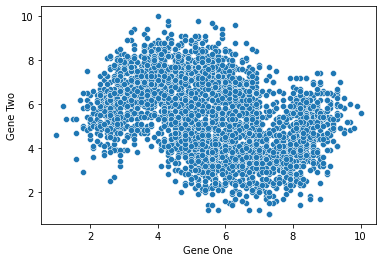

In [2]:
sns.scatterplot(x="Gene One", y="Gene Two", data=df)

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

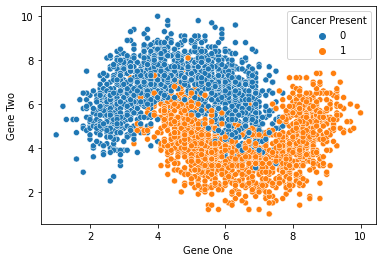

In [3]:
sns.scatterplot(x="Gene One", y="Gene Two", data=df,hue = "Cancer Present")

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

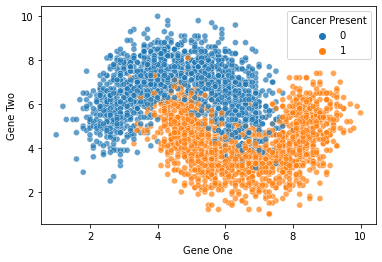

In [4]:
sns.scatterplot(x="Gene One", y="Gene Two", data=df,hue = "Cancer Present", alpha=.7)

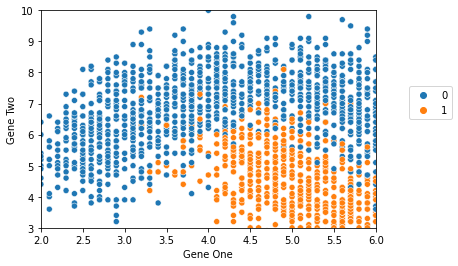

In [5]:
sns.scatterplot(x="Gene One", y="Gene Two", data=df,hue = "Cancer Present")
plt.xlim(2,6)
plt.ylim(3,10)
plt.legend(loc=(1.1,0.5))

In [6]:
X = df.drop('Cancer Present', axis=1)

In [7]:
y = df['Cancer Present']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
scaler = StandardScaler()

In [10]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [13]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [14]:
y_pred = knn_model.predict(scaled_X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [16]:
accuracy_score(y_test, y_pred)

0.8922222222222222

In [17]:
confusion_matrix(y_test,y_pred)

array([[420,  50],
       [ 47, 383]], dtype=int64)

In [18]:
#Show confusion matrix math
(420+383) / (470+430)

0.8922222222222222

In [19]:
1-accuracy_score(y_test, y_pred)
#we have ~10% error rate

0.10777777777777775

In [20]:
knn_model = KNeighborsClassifier(n_neighbors=1)
#This was the previous

In [21]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [22]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [24]:
y_pred = knn_model.predict(scaled_X_test)

In [25]:
accuracy_score(y_test,y_pred)
#we see an improvement when moving from one neighbor to two

0.9

In [26]:
confusion_matrix(y_test,y_pred)

array([[449,  21],
       [ 69, 361]], dtype=int64)

In [28]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
#goes up in accuracy again as we increase neighbors

0.9255555555555556

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=4)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
#goes up in accuracy again as we increase neighbors

0.9233333333333333

In [32]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(scaled_X_train,y_train)
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)
#goes up in accuracy again as we increase neighbors

0.9377777777777778

In [33]:
#Elbow Method

In [39]:
test_error_rates = []
for k in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

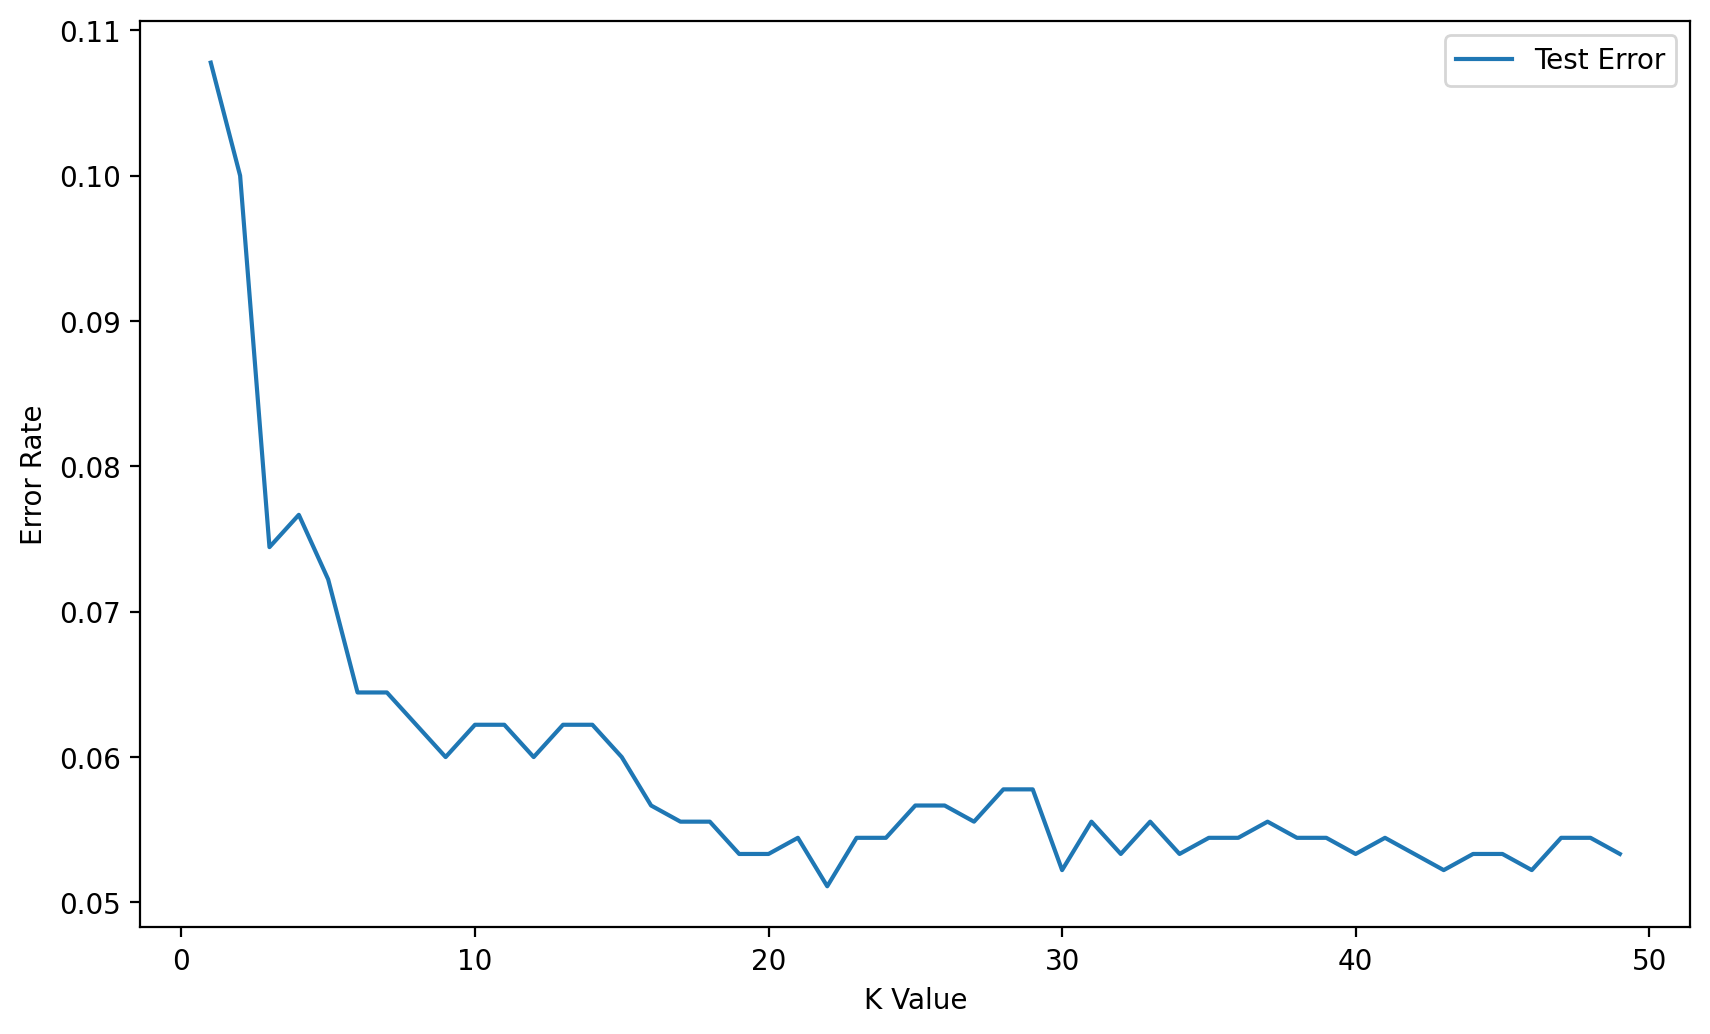

In [40]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,50),test_error_rates,label="Test Error")
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("K Value")